# ADZD Lab 2 DataFrame
## Autor: Paweł Mendroch

### Importy, biblioteki i inicjalizacja

In [1]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
spark = SparkSession.builder.getOrCreate()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1604845242699_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("kiwisolver==1.2.0")
sc.install_pypi_package("matplotlib")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/bf/4c/cb7da76f3a5e077e545f9cf8575b8f488a4e8ad60490838f89c5cdd5bb57/pandas-1.1.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/31/b9/6202dcae729998a0ade30e80ac00f616542ef445b088ec970d407dfd41c0/kiwisolver-1.2.0-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/87/a6/8d7d06f6b69236a3c1818157875ceb1259ba0d9df4194f4fe138ffdc0f41/matplotlib-3.3.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
 

In [3]:
from pyspark.sql.functions import col, asc, desc, max, sum, avg, to_timestamp, date_format, dayofmonth, count

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Import danych dla 28 października 2020

In [5]:
smog_day_df = spark.read.json("s3a://openaq-fetches/realtime/2020-10-28/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
smog_month_df = spark.read.json("s3a://openaq-fetches/realtime/2020-10*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
smog_day_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- attribution: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- averagingPeriod: struct (nullable = true)
 |    |-- unit: string (nullable = true)
 |    |-- value: double (nullable = true)
 |-- city: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |-- country: string (nullable = true)
 |-- date: struct (nullable = true)
 |    |-- local: string (nullable = true)
 |    |-- utc: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mobile: boolean (nullable = true)
 |-- parameter: string (nullable = true)
 |-- sourceName: string (nullable = true)
 |-- sourceType: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- value: double (nullable = true)

In [21]:
smog_month_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- attribution: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- url: string (nullable = true)
 |-- averagingPeriod: struct (nullable = true)
 |    |-- unit: string (nullable = true)
 |    |-- value: double (nullable = true)
 |-- city: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |-- country: string (nullable = true)
 |-- date: struct (nullable = true)
 |    |-- local: string (nullable = true)
 |    |-- utc: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mobile: boolean (nullable = true)
 |-- parameter: string (nullable = true)
 |-- sourceName: string (nullable = true)
 |-- sourceType: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- value: double (nullable = true)

### 1. Znaleźć miasto, w którym najniższe zanieczyszczenie w danym okresie jest największe spośród wszystkich miast

In [52]:
smog_day_min_df = smog_day_df \
    .select(col("parameter"), col("value")) \
    .filter((col("country") == "PL")) \
    .groupBy(col("parameter")) \
    .agg(sum(col("value")).alias("min smog")) \
    .sort(col("min smog").asc()) \
    .first()

smog_day_df \
    .select(col("city"), col("value")) \
    .filter((col("country") == "PL") & (col("parameter") == smog_day_min_df.parameter)) \
    .groupBy(col("city")) \
    .agg(max(col("value")).alias("max smog")) \
    .sort(col("max smog").desc()) \
    .first()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(city='Zielonka', max smog=8.59)

### 2. Ranking miast pod względem liczby dni w roku, w których poziom zanieczyszczeń jest wyższy niż zadany próg

In [26]:
smog_threshold = 1e+05

smog_month_grouped_df = smog_month_df \
    .select(col("city"), col("date.utc"), dayofmonth(to_timestamp(col("date.utc"))).alias("day"), col("value")) \
    .groupBy(col("city"), col("day")) \
    .agg(sum(col("value")).alias("sum smog")) \
    .where((col("sum smog") > smog_threshold)) \
    .sort(col("sum smog").desc())

smog_month_grouped_df \
    .select(col("city"), col("day")) \
    .groupBy(col("city")) \
    .agg(count(col("day")).alias("n of days")) \
    .sort(col("n of days").desc()) \
    .limit(20) \
    .toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    city  n of days
0   三门峡市         31
1   Lima         31
2    沈阳市         31
3    大连市         31
4    宜春市         31
5    深圳市         31
6    上海市         31
7    岳阳市         31
8   攀枝花市         31
9   马鞍山市         31
10   阳泉市         31
11   朝阳市         31
12  景德镇市         31
13   武汉市         31
14   凉山州         31
15   惠州市         31
16   株洲市         31
17   南通市         31
18   长春市         31
19   保定市         31

### 3. Ranking krajów pod względem średniego zanieczyszczenia

In [10]:
smog_day_df \
    .select(col("country"), col("value")) \
    .filter(col("parameter") == "pm25") \
    .groupBy(col("country")) \
    .agg(avg(col("value")).alias("avg smog")) \
    .sort(col("avg smog").desc()) \
    .limit(20) \
    .toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   country    avg smog
0       IN  116.060574
1       PK   98.241224
2       TI   79.695652
3       TJ   78.630556
4       BD   74.070652
5       BH   68.203598
6       KU   65.648649
7       ML   65.361111
8       AF   59.432618
9       IZ   56.518919
10      IQ   50.589216
11      SU   43.068966
12      JO   40.547337
13      BK   39.245614
14      VN   36.666667
15      KV   36.421053
16      MX   36.395242
17      CN   35.499767
18      MK   34.507581
19      SA   34.125000

### 4. Średnie zanieczyszczenie w miastach: na wykresie/mapie

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

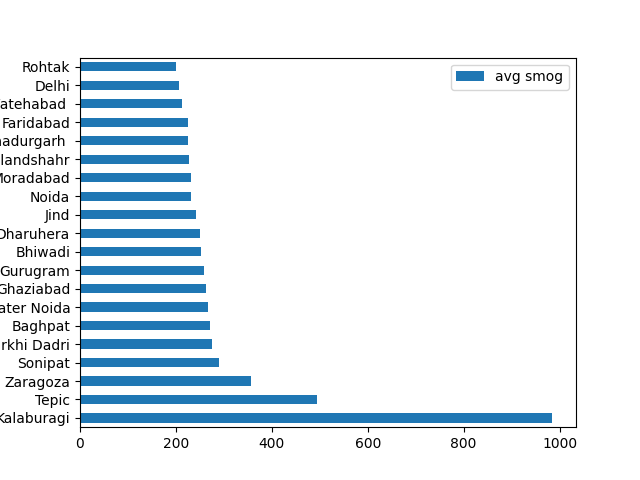

In [23]:
smog_day_df \
    .select(col("city"), col("value")) \
    .filter(col("parameter") == "pm25") \
    .groupBy(col("city")) \
    .agg(avg(col("value")).alias("avg smog")) \
    .sort(col("avg smog").desc()) \
    .limit(20) \
    .toPandas() \
    .plot.barh(x = "city")

%matplot plt

### 5. Korzystanie z klastra dla dużych danych

#### 5.1. Proszę wykonać zadanie 1 dla danych z całego miesiąca. Zmierzyć czas wykonania.

In [86]:
smog_month_min_df = smog_month_df \
    .select(col("parameter"), col("value")) \
    .filter((col("country") == "PL")) \
    .groupBy(col("parameter")) \
    .agg(sum(col("value")).alias("min smog")) \
    .sort(col("min smog").asc()) \
    .first()

smog_month_df \
    .select(col("city"), col("value")) \
    .filter((col("country") == "PL") & (col("parameter") == smog_month_min_df.parameter)) \
    .groupBy(col("city")) \
    .agg(max(col("value")).alias("max smog")) \
    .sort(col("max smog").desc()) \
    .first()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(city='Przemyśl', max smog=325.079)

#### 5.2. Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania.

| 1 workers | 2 workers | 3 workers | 4 workers | 5 workers | 6 workers | 7 workers |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 491.139s | 234.247s | 187.773s | 138.601s | 122.204s | 99.532s | 95.019s |

#### 5.3. Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency).

In [68]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
time_array = [491.139, 234.247, 187.773, 138.601, 122.204, 99.532, 95.019]
speedup_array = list(map(lambda x: time_array[0] / x, time_array))
efficiency_array = [speedup_array[i] / (i + 1) for i in range(len(time_array))]

time_df = pd.DataFrame((time_array), \
                  index=["1 worker", "2 workers", "3 workers", "4 workers", "5 workers", "6 workers", "7 workers"], \
                  columns=["Time"])

speedup_df = pd.DataFrame((speedup_array), \
                  index=["1 worker", "2 workers", "3 workers", "4 workers", "5 workers", "6 workers", "7 workers"], \
                  columns=["Speedup"])

efficiency_df = pd.DataFrame((efficiency_array), \
                  index=["1 worker", "2 workers", "3 workers", "4 workers", "5 workers", "6 workers", "7 workers"], \
                  columns=["Efficiency"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [95]:
time_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              Time
1 worker   491.139
2 workers  234.247
3 workers  187.773
4 workers  138.601
5 workers  122.204
6 workers   99.532
7 workers   95.019

In [96]:
speedup_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            Speedup
1 worker   1.000000
2 workers  2.096671
3 workers  2.615600
4 workers  3.543546
5 workers  4.019009
6 workers  4.934483
7 workers  5.168850

In [97]:
efficiency_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           Efficiency
1 worker     1.000000
2 workers    1.048336
3 workers    0.871867
4 workers    0.885886
5 workers    0.803802
6 workers    0.822414
7 workers    0.738407

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

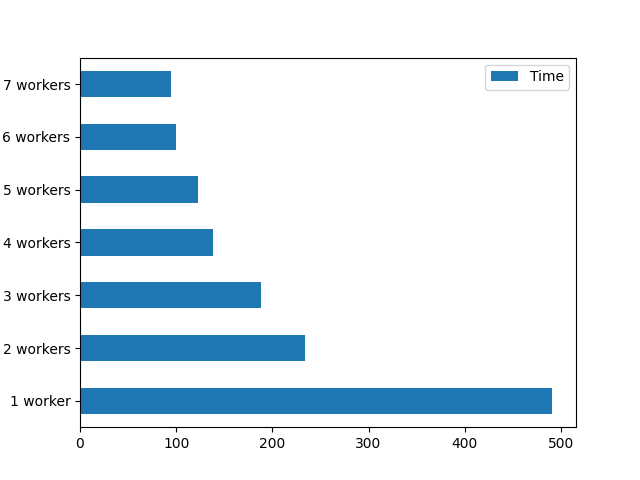

In [98]:
time_df.plot.barh()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

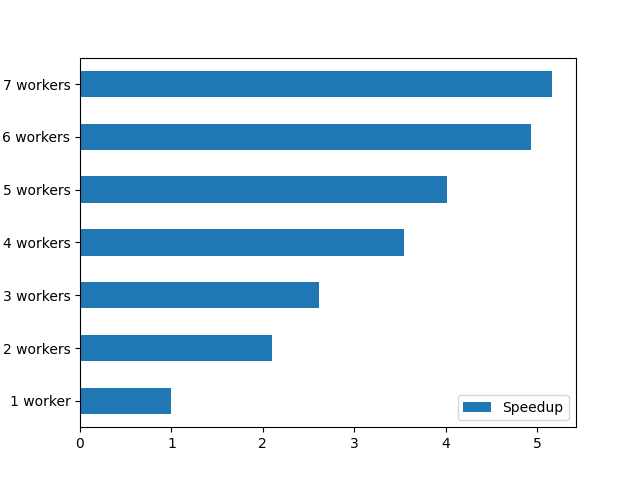

In [99]:
speedup_df.plot.barh()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

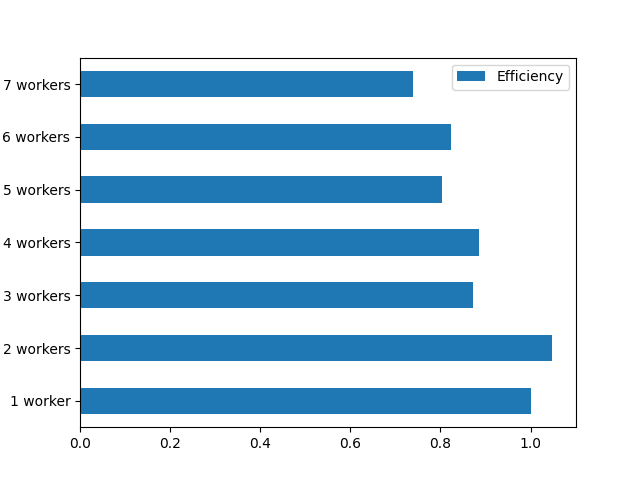

In [100]:
efficiency_df.plot.barh()
%matplot plt

### 6. Proszę wykonać przykładowe zapytanie dla danych z całego roku 2019. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [88]:
smog_year_df = spark.read.json("s3a://openaq-fetches/realtime/2019*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
smog_year_min_df = smog_year_df \
    .select(col("parameter"), col("value")) \
    .filter((col("country") == "PL")) \
    .groupBy(col("parameter")) \
    .agg(sum(col("value")).alias("min smog")) \
    .sort(col("min smog").asc()) \
    .first()

smog_year_df \
    .select(col("city"), col("value")) \
    .filter((col("country") == "PL") & (col("parameter") == smog_year_min_df.parameter)) \
    .groupBy(col("city")) \
    .agg(max(col("value")).alias("max smog")) \
    .sort(col("max smog").desc()) \
    .first()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(city='Gorzów Wielkopolski', max smog=382.798)

Wybrane wykresy dla powyższego zapytania rozbitego na 2 zadania - odszukanie zanieczyszczenia z najmniejszym zużyciem oraz odnalezienie miasta z największym jego zużyciem:

![title](ADZD_L3_1_PMendroch.png)
![title](ADZD_L3_2_PMendroch.png)